In [1]:
import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf
import keras
import warnings
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
mnist = loadmat('./Data/mnist-original.mat')


In [3]:
x = mnist['data'].T
y = mnist['label'][0]

In [4]:
print('MNIST data shape - {0}'.format(x.shape))
print('MNIST label shape - {0}'.format(y.shape))

MNIST data shape - (70000, 784)
MNIST label shape - (70000,)


In [5]:
img_height = 28
img_width = 28
channels = 1

input_shape = (img_height, img_width, channels)
num_classes = 10

epoch = 30
batch_size = 128

In [6]:
x_reshape = x.reshape(x.shape[0], img_height, img_width, channels)

print(x_reshape.shape)

(70000, 28, 28, 1)


In [7]:
y_encoded = keras.utils.to_categorical(y, num_classes)

print(y_encoded.shape)

(70000, 10)


In [8]:
idx = rn.sample(range(0, len(y_encoded)), 10)
y_random = []
for i in idx:
    y_random.append([int(x) for x in y_encoded[i]])

y_random

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
x_reshape = x_reshape.astype('float32')
x_reshape /= 255

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y_encoded, test_size = 0.25, random_state = 0)

In [11]:
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('test data shape : image - {0}, label - {1}'.format(x_test.shape, y_test.shape))

training data shape : image - (52500, 28, 28, 1), label - (52500, 10)
test data shape : image - (17500, 28, 28, 1), label - (17500, 10)


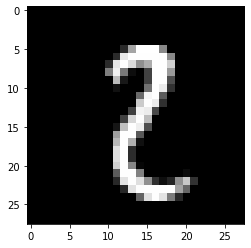

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = rn.randint(0, x_train.shape[0])
plt.imshow(x_train[idx][:,:,0],"gray") 

In [13]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [14]:
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('validation data shape : image - {0}, label - {1}'.format(x_validation.shape, y_validation.shape))


training data shape : image - (39375, 28, 28, 1), label - (39375, 10)
validation data shape : image - (13125, 28, 28, 1), label - (13125, 10)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [16]:
# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [22]:
model.fit(x_train,  
         y_train,
         batch_size = batch_size,
         epochs = epoch,
         verbose = 1,
         validation_data=(x_validation, y_validation))

Train on 39375 samples, validate on 13125 samples
Epoch 1/30
39375/39375 [==============================] - 58s 1ms/step - loss: 2.2508 - accuracy: 0.1879 - val_loss: 2.1758 - val_accuracy: 0.4930
Epoch 2/30
39375/39375 [==============================] - 61s 2ms/step - loss: 2.0923 - accuracy: 0.3671 - val_loss: 1.9022 - val_accuracy: 0.6574
Epoch 3/30
39375/39375 [==============================] - 60s 2ms/step - loss: 1.7261 - accuracy: 0.5111 - val_loss: 1.3201 - val_accuracy: 0.7078
Epoch 4/30
39375/39375 [==============================] - 60s 2ms/step - loss: 1.2642 - accuracy: 0.6241 - val_loss: 0.8508 - val_accuracy: 0.7938
Epoch 5/30
39375/39375 [==============================] - 58s 1ms/step - loss: 0.9654 - accuracy: 0.7051 - val_loss: 0.6318 - val_accuracy: 0.8432
Epoch 6/30
39375/39375 [==============================] - 54s 1ms/step - loss: 0.8153 - accuracy: 0.7471 - val_loss: 0.5286 - val_accuracy: 0.8632
Epoch 7/30
39375/39375 [==============================] - 38s 973us/

KeyboardInterrupt: 

In [20]:
model.save('digit_recog.h5')

In [32]:
model.evaluate(x_test, y_test)


17500/17500 [==============================] - 5s 301us/step


[0.040855910042038056, 0.9904000163078308]

In [2]:
model =keras.models.load_model('./Model/digit_recog.h5')

In [30]:
from keras.preprocessing.image import load_img,img_to_array
import cv2
from PIL import Image

# image = cv2.imread('./test/test.jpg',cv2.IMREAD_GRAYSCALE)
# # img = load_img('./test/test.jpg')
# # print(img.size)
# # image_array = img_to_array(img)
# # image_array = image_array.reshape((255,255))
# image = cv2.resize(image,(img_height,img_width))
# image = image/255
# image
# x = np.expand_dims(image,-1)
# # img = Image.fromarray(x,'L')
# # img.save('Hi.png')
# # img.show()
# x= np.expand_dims(x,0)
# x.shape
# model.predict(x)
def load_image(filename):
    img = load_img(filename,grayscale=True,target_size=(28,28))
    img  = img_to_array(img)
    img = img.reshape(1,28,28,1)
    img = img.astype('float32')
    img = img/255.0
    return img

def run_example():
    img = load_image('./test/test5.png')
    digit = model.predict_classes(img)
    result  =model.predict(img)
    print(result)
    print(digit[0])

run_example()

[[7.5633585e-04 1.7822363e-03 9.4288075e-01 4.0614258e-02 8.1750466e-07
  1.6333490e-03 8.4890256e-04 5.3397426e-04 1.0851977e-02 9.7393873e-05]]
2


0



----------------Contoured Image--------------------


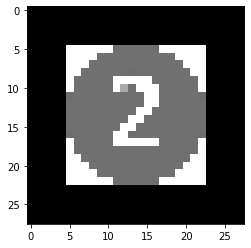

In [29]:
import cv2
image = cv2.imread('./test/test5.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
print(len(contours))
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
import matplotlib.pyplot as plt
resized_digit = cv2.resize(grey, (18,18))
padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
preprocessed_digits.append(padded_digit)

print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(padded_digit, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




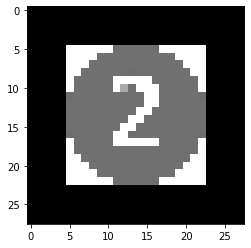



Final Output: 0

Prediction (Softmax) from the neural network:

 [8]


TypeError: 'numpy.float64' object does not support item assignment

In [33]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1,28,28,1))
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")

print(prediction)


In [35]:
model.predict_classes(preprocessed_digits[0].reshape(1,28,28,1))

array([8])